In [19]:
import numpy as np
import networkx as nx
import pandas as pd
from numpy.random import uniform, randint
from node import EpidemicGraph, TransitionDiagram, calc_R0
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline

((6.405895653797417+0j), (6.099277175435026+0j)) (5, 1)


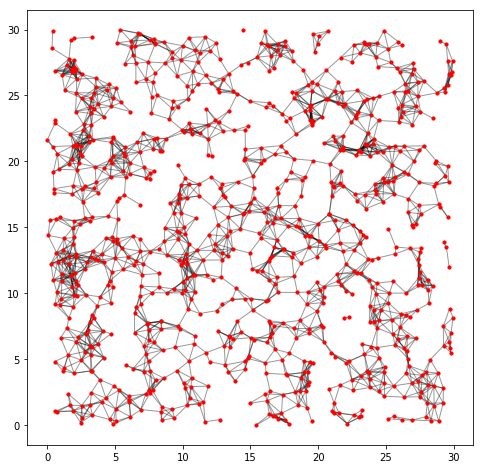

In [33]:
paramet = {
        'alpha': [0.03, 0.06], # infect rate 
        'mu': [0.14, 0.14], # sleep s 
        'gamma': [0.35, 0.47], # rec rate 
        'lambda': [0.05, 0.32], # sleep I1 
        'kappa': [0.04, 0.31] # sleep I2    % [I2_s -> I2_a, I2_a -> I2_s]
    }
paramet = {
        'alpha': [0.2, 0.15], # infect rate 
        'mu': [0.04, 0.04], # sleep s 
        'gamma': [0.08, 0.05], # rec rate 
        'lambda': [0.1, 0.12], # sleep I1 
        'kappa': [0.09, 0.11] # sleep I2    % [I2_s -> I2_a, I2_a -> I2_s]
    }
N = 900
r = 1.5
# paramet = {
#         'alpha': [0.03, 0.35], # infect rate 
#         'mu': [0.14, 0.14], # sleep s 
#         'gamma': [0.35, 0.3], # rec rate 
#         'lambda': [0.05, 0.32], # sleep I1 
#         'kappa': [0.04, 0.31] # sleep I2    % [I2_s -> I2_a, I2_a -> I2_s]
#     }

a = EpidemicGraph(N,r,paramet,I1_a=10, I2_a=10, grid_size=[30,30]) # net='Uniform Grid'
number_subgraphs = len(list(nx.connected_component_subgraphs(a.G)))
number_isolated_nodes = len(list(nx.isolates(a.G)))
print(calc_R0(a.G, paramet), (number_subgraphs, number_isolated_nodes))

G = a.G
# a.run(300)
# a.G[0]
# asd = a.hist2pandas()
# asd1 = asd[['I1_a','I1_s','I2_a','I2_s']]/N
# asd1.plot()

pos = nx.get_node_attributes(G, 'position')
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos,
                       node_size=10,
                       cmap=plt.cm.Reds_r)
plt.show()

('n', 5)
('r', 2)
('paramet', {'alpha': [0.2, 0.15], 'mu': [0.04, 0.04], 'gamma': [0.08, 0.05], 'lambda': [0.1, 0.12], 'kappa': [0.09, 0.11]})
('nstep', 10000)
('I1_a', 10)
('I2_a', 10)
('grid_size', [30, 30])
('net', 'Geometric Random')
(1 0/1 ((8.594533155644015+0j), (8.151124833416246+0j)))
(2 1/2 ((10.289543503197956+0j), (9.740197034248098+0j)))
(3 0/1 ((9.064877725992636+0j), (8.592072868118068+0j)))
(4 0/1 ((8.338067507640005+0j), (7.910688288412502+0j)))
(5 0/1 ((8.42516957161737+0j), (7.992346473391256+0j)))



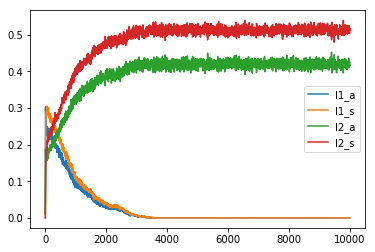

In [40]:
def monte(n, r, paramet, nstep=100, I1_a=10, I2_a=10, grid_size=[30,30], net='Geometric Random'): # 'Geometric Random', 'Uniform Grid'
    for item in locals().items():
        print(item)
    listt = []
    for i in range(n):
        a = EpidemicGraph(N, r, paramet, I1_a=I1_a, I2_a=I1_a, grid_size=grid_size, net=net)
        a.run(nstep)
        listt.append(a.hist2pandas())
        number_subgraphs = len(list(nx.connected_component_subgraphs(a.G)))
        number_isolated_nodes = len(list(nx.isolates(a.G)))
        print(f'({i+1} {number_isolated_nodes}/{number_subgraphs} {calc_R0(a.G, paramet)})', end='\n')
    print()
    df = listt[0]
    del listt[0]
    for v in listt:
        df += v
    df /= n
    return df

paramet = {
        'alpha': [0.2, 0.15], # infect rate 
        'mu': [0.04, 0.04], # sleep s 
        'gamma': [0.08, 0.05], # rec rate 
        'lambda': [0.1, 0.12], # sleep I1 
        'kappa': [0.09, 0.11] # sleep I2    % [I2_s -> I2_a, I2_a -> I2_s]
    }
# paramet = {
#         'alpha': [0.03, 0.06], # infect rate 
#         'mu': [0.14, 0.14], # sleep s 
#         'gamma': [0.35, 0.47], # rec rate 
#         'lambda': [0.05, 0.32], # sleep I1 
#         'kappa': [0.04, 0.31] # sleep I2    % [I2_s -> I2_a, I2_a -> I2_s]
#     }

setup = {'n':5, 
         'r':2, 
         'paramet': paramet,
         'nstep':10000,
         'I1_a':10, 
         'I2_a':10, 
         'grid_size':[30,30]}
N = 900



rnd_monte = monte(net='Geometric Random', **setup)
# rnd_monte.to_csv(f"monte_random_r={setup['r']}_{setup['n']}.csv", index=False)
asd1 = rnd_monte[['I1_a','I1_s','I2_a','I2_s']]/N
asd1.plot()




('n', 5)
('r', 2)
('paramet', {'alpha': [0.2, 0.15], 'mu': [0.04, 0.04], 'gamma': [0.08, 0.05], 'lambda': [0.1, 0.12], 'kappa': [0.09, 0.11]})
('nstep', 10000)
('I1_a', 10)
('I2_a', 10)
('grid_size', [30, 30])
('net', 'Uniform Grid')
(1 0/1 (6.4298985944116644, 6.1217799322609405))
(2 0/1 (6.4298985944116644, 6.1217799322609405))
(3 0/1 (6.4298985944116644, 6.1217799322609405))
(4 0/1 (6.4298985944116644, 6.1217799322609405))
(5 0/1 (6.4298985944116644, 6.1217799322609405))



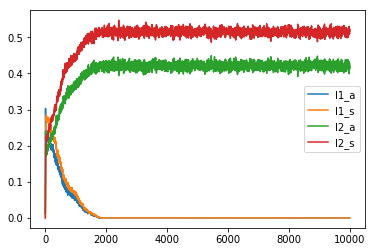

In [41]:
uni_monte = monte(net='Uniform Grid', **setup)
uni_monte.to_csv(f'monte_uniform_r={setup["r"]}_{setup["n"]}.csv', index=False)
asd2 = uni_monte[['I1_a','I1_s','I2_a','I2_s']]/N
asd2.plot()

In [15]:
# print(sample(list(a.G[0]), len(a.G[0])))
# list(a.G[0])
len(list(nx.isolates(a.G)))
graphs = len(list(nx.connected_component_subgraphs(a.G)))


126

In [56]:
nod = a.G.node[0]
# nod['state'] = 'I1_a'
diag.next(a.G, 0)
a.G.node[0]['state'] = a.G.node[0]['next_state']
a.G.node[0]

{'state': 'S_a',
 'position': array([0.79454763, 6.50435499]),
 'next_state': 'S_a'}

In [40]:
uniform(0,[10,1],2)
randint(0, 100,10)
s= sample(range(20), 10)
# print(s[:5], s[5:])
print(s)
del s[1]
s

[10, 9, 6, 3, 7, 11, 0, 12, 8, 2]


[10, 6, 3, 7, 11, 0, 12, 8, 2]

In [31]:
paramet = {
        'alpha': [0.03, 0.06], # infect rate 
        'mu': [0.14, 0.14], # sleep s 
        'gamma': [0.35, 0.47], # rec rate 
        'lambda': [0.05, 0.32], # sleep I1 
        'kappa': [0.04, 0.31] # sleep I2    % [I2_s -> I2_a, I2_a -> I2_s]
    }

def dist(pos1,pos2):
#     return math.sqrt((pos1-pos2))
    return np.linalg.norm(pos1-pos2)

dist(np.array([0,0]), np.array([0,1]))

1.0

In [5]:
transitions = {
            'S_a': {
                'S_s': paramet['mu'][1],
                'I1_a': paramet['alpha'][0],
                'I2_a': paramet['alpha'][1]
            },
            'S_s': {
                'S_a': paramet['mu'][0]
            },
            'I1_a': {
                'S_a': paramet['gamma'][0],
                'I1_s': paramet['lambda'][1]
            },
            'I1_s': {
                'I1_a': paramet['lambda'][0]
            },
            'I2_a': {
                'S_a': paramet['gamma'][1],
                'I2_s': paramet['kappa'][1]
            },
            'I2_s':{
                'I2_a': paramet['kappa'][0]
            }
        }
transitions


{'S_a': {'S_s': 0.14, 'I1_a': 0.03, 'I2_a': 0.06},
 'S_s': {'S_a': 0.14},
 'I1_a': {'S_a': 0.35, 'I1_s': 0.32},
 'I1_s': {'I1_a': 0.05},
 'I2_a': {'S_a': 0.47, 'I2_s': 0.31},
 'I2_s': {'I2_a': 0.04}}

In [64]:
[x for x, y in a.G.nodes(data=True) if y['state']=='S_a']
population_count = {
            'S_a':  10,
            'S_s':  0,
            'I1_a': 0,
            'I1_s': 0,
            'I2_a': 0,
            'I2_s': 0
        }
def foo(v):
            if v < 0:
                return False
            else:
                return True
all([foo(v) for v in population_count.values()])

True

In [3]:
from pymatbridge import Matlab
# mlab = Matlab(executable='C:\Program Files\MATLAB\MATLAB Production Server\R2015a\bin\matlab')
mlab = Matlab(executable='matlab')

mlab.start()


Starting MATLAB on ZMQ socket tcp://127.0.0.1:6461
Send 'exit' command to kill the server
.......MATLAB started and connected!


In [10]:
res = mlab.run_func('main_main.m', {'arg1': 3, 'arg2': 5})
# res = mlab.run_code('a=1')
print(res['result'])
res
mlab.run_func()

{'content': {'stdout': 'Attempt to execute SCRIPT main_main as a function:\nA:\\Dropbox\\8th\\Capstone\\Epidemic-Model\\epidemic_3\\main_main.m'},
 'result': '',
 'success': False}

In [15]:
res = mlab.run_code(
'''
RunTime = 300;
monte_rounds = 5;
dim = [30,30]; 
global I1a_Initial I2a_Initial N dt 
N = dim(1)*dim(2);
I1a_Initial = 10; %I1_A_Initial 
I2a_Initial = 10; %I2_A_Initial 
dt = 0.05;

global alpha mu gamma lambda kappa
alpha = [0.03, 0.06]; % infect rate 
mu = [0.14, 0.14]; % sleep s 
gamma = [0.35, 0.47]; % rec rate 
lambda = [0.05, 0.32]; % sleep I1 
kappa = [0.04, 0.31]; % sleep I2    % [I2_s -> I2_a, I2_a -> I2_s]

r0=3;
Net2 = NetGen_Geo(N,r0,dim);
NetRnd = NetCmbn({Net2, Net2});
[R0_rnd,R1_rnd,R2_rnd] = calc_R0(NetRnd, alpha, mu, gamma, lambda, kappa, N);
[R1_rnd;R2_rnd]
%% Monte Dima
x0_rnd = Initial_Cond_Gen(N,'Population',[3,5],[I1a_Initial,I2a_Initial]);
Para = Para_active_sleep_SI1I2S(alpha, mu, gamma, lambda, kappa); 
M = Para{1}; 
StopCond={'RunTime', RunTime};

[t, rnd_stch] = monte_new(monte_rounds,N,Para,NetRnd,x0_rnd,StopCond,I1a_Initial,I2a_Initial);
''')
res


{'content': {'stdout': '\r\nR11 =\r\n\r\n    0.8699\r\n\r\n\r\nR21 =\r\n\r\n    1.4227\r\n\r\n\r\nans =\r\n\r\n    0.8770\r\n    1.4298\r\n\r\nElapsed time is 4.007603 seconds.\r\nElapsed time is 3.916985 seconds.\r\nElapsed time is 3.951945 seconds.\r\nElapsed time is 3.763409 seconds.\r\nElapsed time is 3.791015 seconds.\r\n',
  'figures': [],
  'datadir': 'C:\\Users\\DFed\\AppData\\Local\\Temp\\MatlabData\\'},
 'result': [],
 'success': True}

In [17]:
rnd_stch = mlab.get_variable('rnd_stch')
t = mlab.get_variable('t')
# res = mlab.run_func('main_main.m', {'arg1': 3, 'arg2': 5})

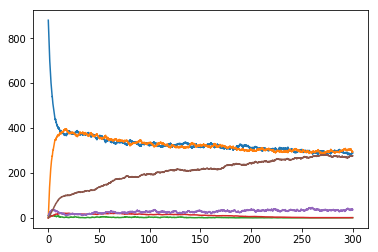

In [20]:
import matplotlib.pyplot as plt

plt.plot(t, rnd_stch.T)
plt.show()